In [1]:
import matplotlib

In [2]:
from matplotlib import pyplot as plt

What is ggplot in Python?

Using ggplot in Python allows you to build visualizations incrementally, first focusing on your data and then adding and tuning components to improve its graphical representation.

In [3]:
plt.style.use('ggplot')

Purpose of %matplotlib inline:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

What is plt.rcParams['...']:

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.rcParams convenience routine. 

for indepth understanding visit: https://www.geeksforgeeks.org/matplotlib-pyplot-rc-in-python

In [7]:
plt.rcParams['figure.figsize'] = (12,8)

In [8]:
data = pd.read_csv('bike_sharing_data.txt')

In [9]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

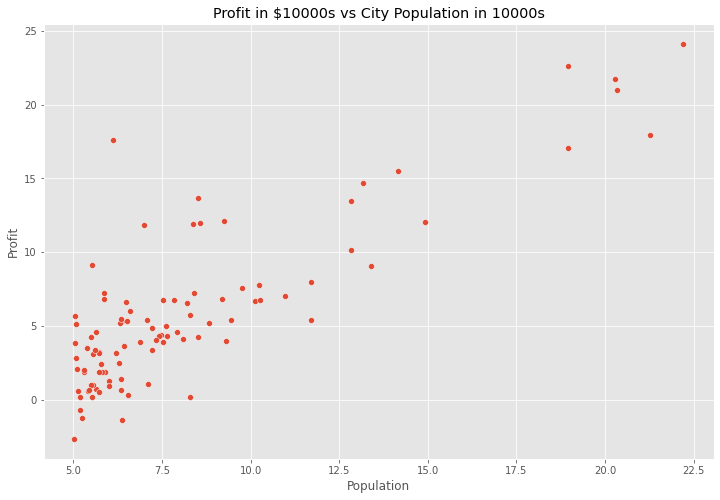

In [11]:
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s")

In [12]:
def cost_function(x,y,theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1/(2*m) * np.sum(error)

In [13]:
m = data.Population.values.size
x = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(x,y,theta)

32.072733877455676

In [14]:
#theta = np.zeros((2,1))
def gradient_descent(x,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred-y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(x,y,theta))
    return theta, costs

In [15]:
theta, costs = gradient_descent(x,y,theta,alpha=0.01,iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(x,y,t)

C:\Users\NEERAJ~1\AppData\Local\Temp/ipykernel_27880/1225016864.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


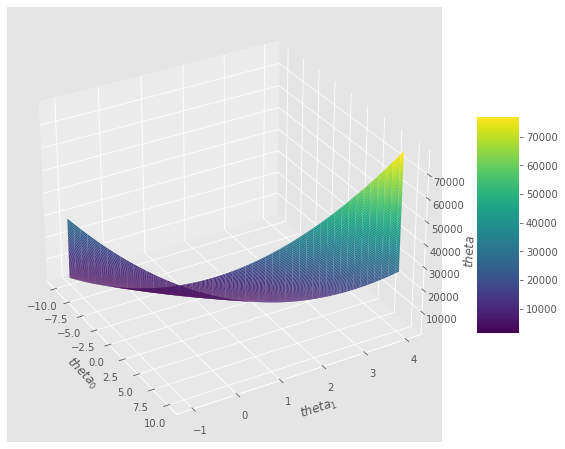

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)\

plt.xlabel("$\ttheta_0$")
plt.ylabel("$\ttheta_1$")
ax.set_zlabel("$\ttheta$")
ax.view_init(30,330)

plt.show()

Text(0.5, 1.0, 'Values of the cost values over iterations of gradient descent')

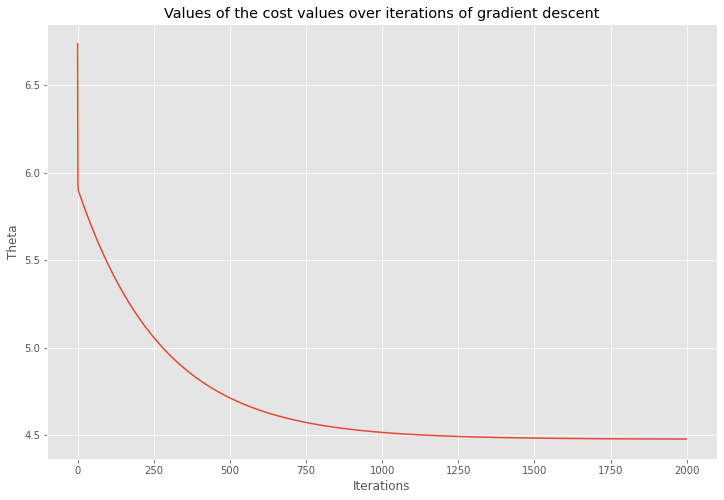

In [19]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.title("Values of the cost values over iterations of gradient descent")

C:\Users\Neeraja Vudhanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Line')

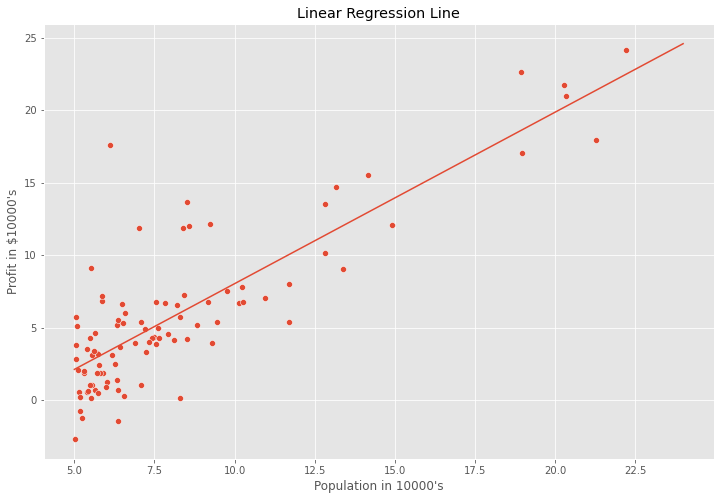

In [20]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)

x_values = [x for x in range(5,25)]
y_values = [(x*theta[1]+theta[0]) for x in x_values]

sns.lineplot(x_values,y_values)

plt.xlabel("Population in 10000's")
plt.ylabel("Profit in $10000's")
plt.title("Linear Regression Line")


In [21]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [24]:
y_pred_1 = predict(np.array([1,4]),theta) * 10000
print("The predicted profit for a population of 40,000 is:"+str(round(y_pred_1,0)))

The predicted profit for a population of 40,000 is:9408.0


In [26]:
y_pred_2 = predict(np.array([1,8.3]),theta) * 10000
print("The predicted profit for a population of 83,000 is:"+str(round(y_pred_2,0)))

The predicted profit for a population of 83,000 is:60243.0
